# Titanic Challenge Notebook

In [62]:
# standard libraries 
import os
import pandas as pd
import numpy as np 

%matplotlib inline 
import matplotlib
import matplotlib.pyplot as plt

In [63]:
# function to load our data 
def load_titanic_data(file):
    return pd.read_csv(file)

In [64]:
train_titanic = load_titanic_data("train.csv")
test_titanic = load_titanic_data("test.csv") # DO NOT LOOK AT

In [65]:
train_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Looks like there is some NaN data...need to clean it up somehow. Will assume that names probably don't have anything to do with survival....

### Transform Text Attributes to Numerical Attributes

In [66]:
# Remove some unwanted attributes
train_titanic.drop(["Cabin", "Ticket", "Name"], axis=1, inplace=True)

In [67]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
titanic_sex_cat = train_titanic[["Sex"]]
titanic_sex_enc = ord_enc.fit_transform(titanic_sex_cat)
train_titanic["Sex"] = titanic_sex_enc

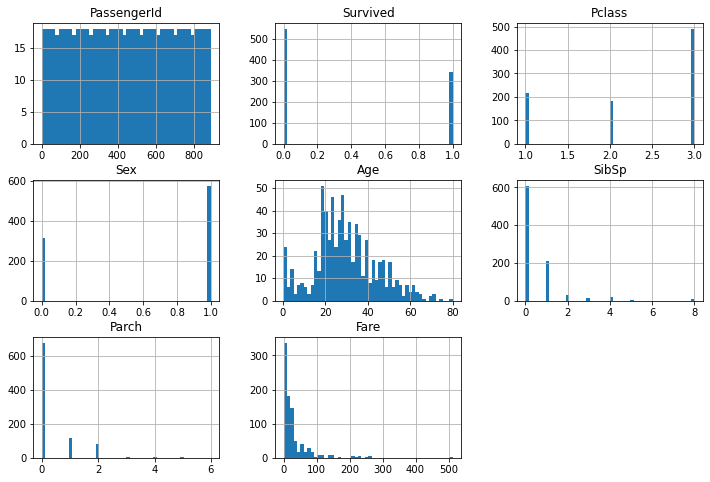

In [68]:
train_titanic.hist(bins=50, figsize=(12,8))
plt.show()

### Look for correlations

In [69]:
corr_matrix = train_titanic.corr()
# check how much each attribute correlates with survival
corr_matrix["Survived"].sort_values(ascending=False)
# with new sex text to num transform, can see that sex has high negative correlation

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Sex           -0.543351
Name: Survived, dtype: float64

array([[<AxesSubplot:xlabel='Survived', ylabel='Survived'>,
        <AxesSubplot:xlabel='Fare', ylabel='Survived'>,
        <AxesSubplot:xlabel='Age', ylabel='Survived'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Survived'>,
        <AxesSubplot:xlabel='Sex', ylabel='Survived'>],
       [<AxesSubplot:xlabel='Survived', ylabel='Fare'>,
        <AxesSubplot:xlabel='Fare', ylabel='Fare'>,
        <AxesSubplot:xlabel='Age', ylabel='Fare'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Fare'>,
        <AxesSubplot:xlabel='Sex', ylabel='Fare'>],
       [<AxesSubplot:xlabel='Survived', ylabel='Age'>,
        <AxesSubplot:xlabel='Fare', ylabel='Age'>,
        <AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Age'>,
        <AxesSubplot:xlabel='Sex', ylabel='Age'>],
       [<AxesSubplot:xlabel='Survived', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Fare', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Age', ylabel='Pclass'>,
        <AxesSubplot:xlab

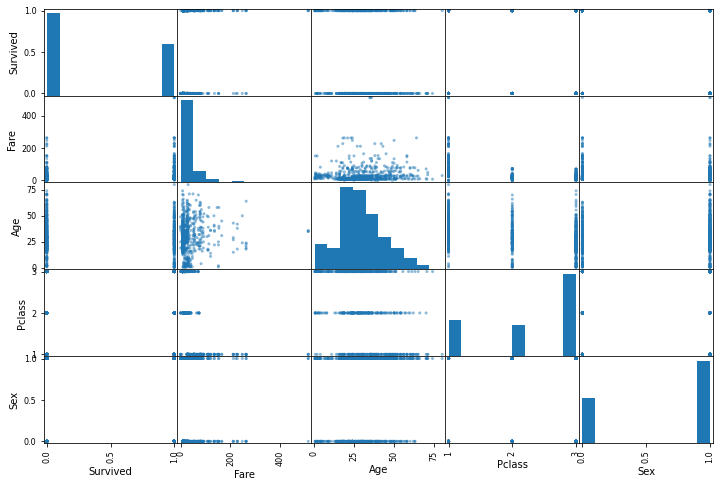

In [70]:
from pandas.plotting import scatter_matrix

attributes = ["Survived", "Fare", "Age", "Pclass", "Sex"]
scatter_matrix(train_titanic[attributes], figsize=(12,8))

### Prepare data for prelim model analysis

In [87]:
y_train = train_titanic["Survived"].copy()
X_train = train_titanic.copy().drop(["Survived"], axis=1)

In [88]:
# write a pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

text_attribs = ["Sex"]
one_hot_attribs = ["Embarked"]

text_to_num_pipeline = ColumnTransformer([
    ("text_transform", OrdinalEncoder(), text_attribs),
    ("one_hot_transformer", OneHotEncoder(), one_hot_attribs)
])
X_train = text_to_num_pipeline.fit_transform(X_train)

In [94]:
# TODO: standardize the data somehow here

### Try out different models

In [89]:
# metric imports
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score

In [91]:
# try a SGD classifier
from sklearn.linear_model import SGDClassifier

sgd_cls = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_cls.fit(X_train, y_train)
sgd_pred = sgd_cls.predict(X_train)

p_score = precision_score(y_train, sgd_pred)
r_score = recall_score(y_train, sgd_pred)

print(f"Precision = {p_score}")
print(f"Recall = {r_score}")


Precision = 0.7420382165605095
Recall = 0.6812865497076024


In [92]:
# try a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

forest_cls = RandomForestClassifier()
forest_cls.fit(X_train, y_train)
forest_pred = cross_val_predict(forest_cls, X_train, y_train, cv=10)

p_score = precision_score(y_train, forest_pred)
r_score = recall_score(y_train, forest_pred)

print(f"Precision = {p_score}")
print(f"Recall = {r_score}")

Precision = 0.7420382165605095
Recall = 0.6812865497076024


In [93]:
# try a logistic regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_pred = log_reg.predict(X_train)

p_score = precision_score(y_train, log_pred)
r_score = recall_score(y_train, log_pred)

print(f"Precision = {p_score}")
print(f"Recall = {r_score}")

Precision = 0.7420382165605095
Recall = 0.6812865497076024
